In [1]:
import torch
import torch.nn as nn
from numpy import exp, array, random, dot
import numpy as np

In [23]:
n_input = 3
n_hidden = 0
n_out = 1
batch_size = 4
learning_rate = 0.1

In [24]:
def convert_np_to_torch(numpy_data_from_one_file):
    return torch.Tensor(np.array(numpy_data_from_one_file, dtype=(np.float32)))


In [32]:
x = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = array([[0],[1],[1],[1]])

data_x = convert_np_to_torch(x)
data_y = convert_np_to_torch(y)

print("Data x:", data_x.T)
print("Data y:", data_y.T)
print(data_x.dtype)
print(data_y.dtype)
print(data_x.size())
print(data_y.size())

Data x: tensor([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.]])
Data y: tensor([[0., 1., 1., 1.]])
torch.float32
torch.float32
torch.Size([4, 3])
torch.Size([4, 1])


In [27]:
model = nn.Sequential(nn.Linear(n_input, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Sigmoid()
)


In [28]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
losses = []
for epoch in range(10000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())
    #print("Pred: ", pred_y.T)
    #print("Data: ", data_y.T)
    #print("Loss: ", loss.T)
    #print("Losses: ", losses)

    model.zero_grad()
    loss.backward()

    optimizer.step()

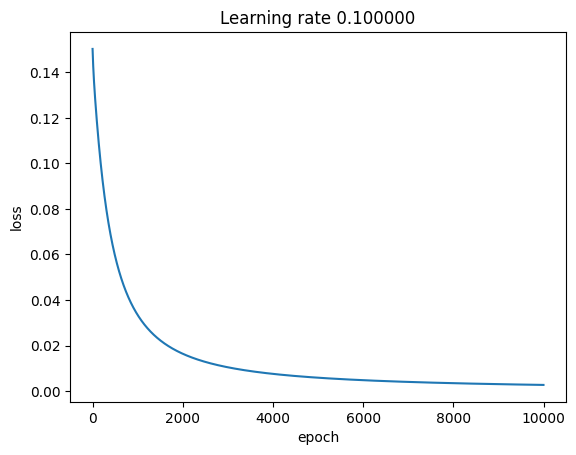

In [30]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

Test:

In [31]:
tx = array([0, 0, 0])
test_x = convert_np_to_torch(tx)
print(model(test_x)[0].item())

0.19648641347885132
